# Seed classification

Seeds from three different types of wheat (Kama, Rosa and Canadian) are measured using the following features:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

The data file columns are these measurements, and the final column is 1,2, or 3, specifying the wheat type.

In [16]:
%matplotlib inline
import pylab
pylab.style.use("ggplot")
import numpy as np
import sklearn as sl
import pandas

Load the data

In [13]:
df = pandas.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt",
                     delim_whitespace=True, header=None,
                names=["area","peri","comp","len","wid","asym","groov","type"])

In [15]:
print(df)

      area   peri    comp    len    wid    asym  groov  type
0    15.26  14.84  0.8710  5.763  3.312  2.2210  5.220     1
1    14.88  14.57  0.8811  5.554  3.333  1.0180  4.956     1
2    14.29  14.09  0.9050  5.291  3.337  2.6990  4.825     1
3    13.84  13.94  0.8955  5.324  3.379  2.2590  4.805     1
4    16.14  14.99  0.9034  5.658  3.562  1.3550  5.175     1
5    14.38  14.21  0.8951  5.386  3.312  2.4620  4.956     1
6    14.69  14.49  0.8799  5.563  3.259  3.5860  5.219     1
7    14.11  14.10  0.8911  5.420  3.302  2.7000  5.000     1
8    16.63  15.46  0.8747  6.053  3.465  2.0400  5.877     1
9    16.44  15.25  0.8880  5.884  3.505  1.9690  5.533     1
10   15.26  14.85  0.8696  5.714  3.242  4.5430  5.314     1
11   14.03  14.16  0.8796  5.438  3.201  1.7170  5.001     1
12   13.89  14.02  0.8880  5.439  3.199  3.9860  4.738     1
13   13.78  14.06  0.8759  5.479  3.156  3.1360  4.872     1
14   13.74  14.05  0.8744  5.482  3.114  2.9320  4.825     1
15   14.59  14.28  0.899

Plot every pair of columns; color code seed type.

In [38]:
df.columns.values

array(['area', 'peri', 'comp', 'len', 'wid', 'asym', 'groov', 'type'], dtype=object)

In [19]:
colors=["DarkRed","DarkGreen","DarkBlue"]

/home/kaan/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


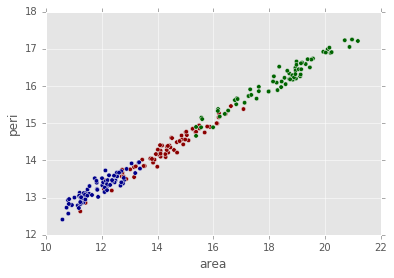

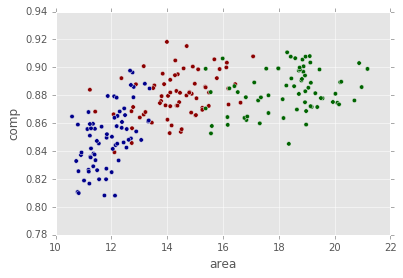

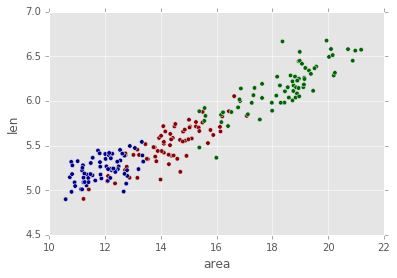

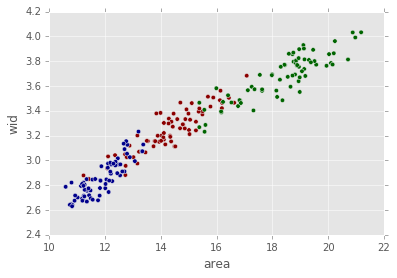

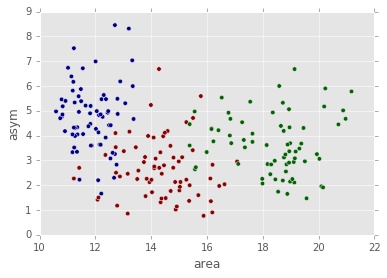

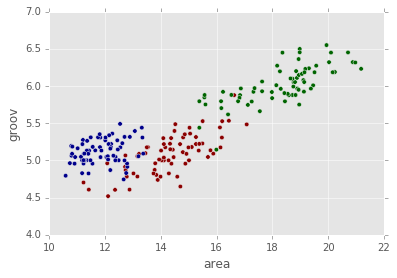

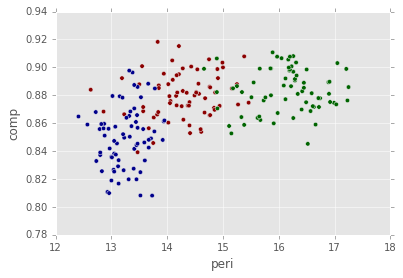

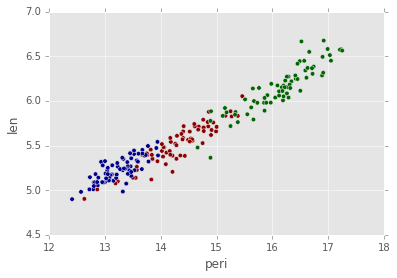

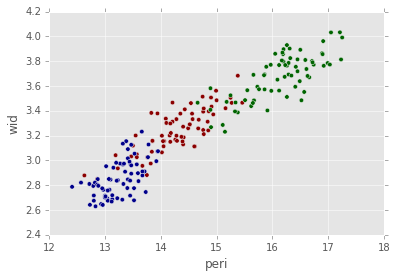

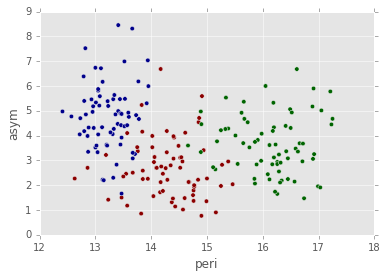

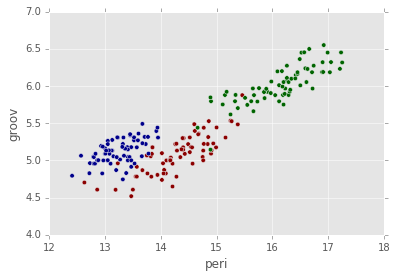

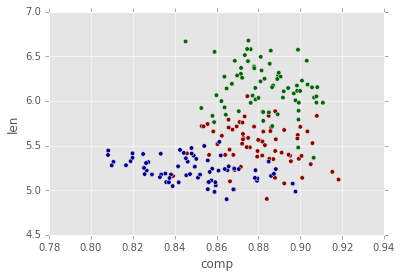

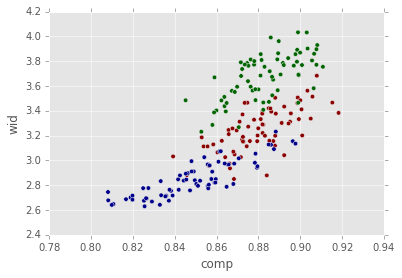

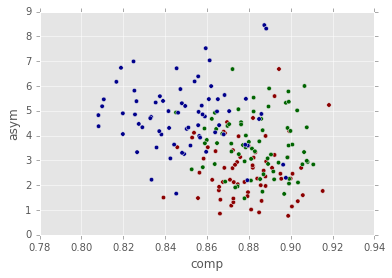

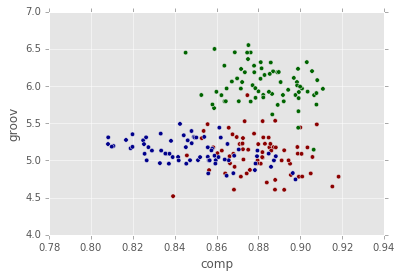

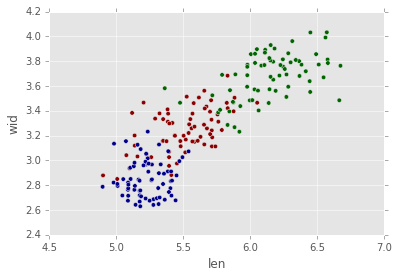

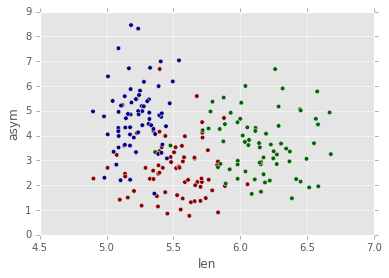

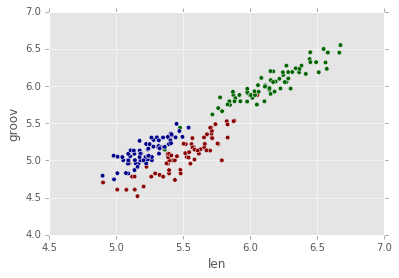

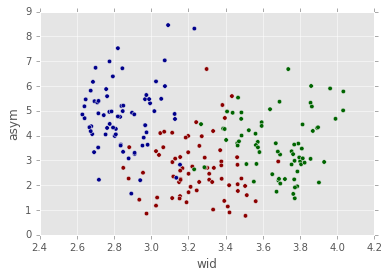

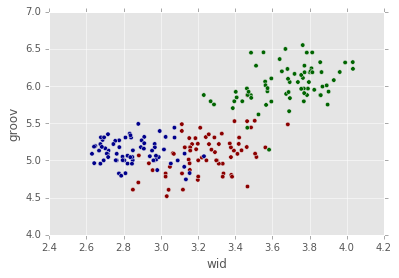

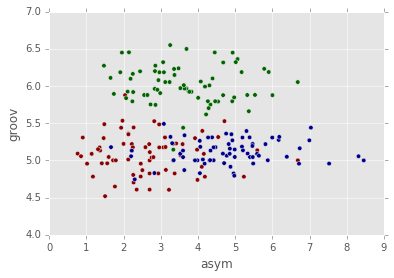

In [43]:
for n,axis1 in enumerate(df.columns.values):
    for axis2 in df.columns.values[n:-1]:
        if axis1 == axis2:
            continue
        df.plot.scatter(x=axis1,y=axis2, c = [colors[i-1] for i in df["type"]])

## SVM with cross-validation

In [52]:
from sklearn import cross_validation, svm

In [49]:
X = df.values[:,:-1]
y = df.values[:,-1]

In [54]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((157, 7), (53, 7), (157,), (53,))

In [59]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [61]:
clf.score(X_test, y_test)

0.84905660377358494

Use k-folding

In [71]:
clf = svm.SVC(kernel='linear', C=1)
scores = cross_validation.cross_val_score(clf, X, y, cv=5)
print(scores)
print(scores.mean())

[ 0.97619048  0.97619048  0.9047619   0.95238095  0.69047619]
0.9


In [72]:
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_validation.cross_val_score(clf, X, y, cv=5)
print(scores)
print(scores.mean())

[ 0.95238095  0.95238095  0.9047619   0.92857143  0.71428571]
0.890476190476


In [73]:
clf = svm.SVC(kernel='poly', C=1)
scores = cross_validation.cross_val_score(clf, X, y, cv=5)
print(scores)
print(scores.mean())

[ 1.          0.95238095  0.92857143  1.          0.80952381]
0.938095238095


In [74]:
clf = svm.SVC(kernel='sigmoid', C=1)
scores = cross_validation.cross_val_score(clf, X, y, cv=5)
print(scores)
print(scores.mean())

[ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]
0.333333333333


## Decision tree with cross-validation

In [75]:
from sklearn import tree

In [78]:
clf = tree.DecisionTreeClassifier()

scores = cross_validation.cross_val_score(clf, X, y, cv=5)
print(scores)
print(scores.mean())

[ 0.95238095  0.92857143  0.9047619   0.95238095  0.88095238]
0.92380952381


## Random forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
clf = RandomForestClassifier()

scores = cross_validation.cross_val_score(clf, X, y, cv=5)
print(scores)
print(scores.mean())

[ 0.9047619   0.95238095  0.95238095  0.95238095  0.64285714]
0.880952380952


## Logistic regression

In [85]:
from sklearn.linear_model import LogisticRegressionCV

In [97]:
clf = LogisticRegressionCV()

scores = cross_validation.cross_val_score(clf, X, y, cv=5)
print(scores)
print(scores.mean())

## Apply LDA and PCA, then train SVM

In [99]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [131]:
pca = PCA(n_components=4)
X_r = pca.fit(X).transform(X)

In [132]:
lda = LinearDiscriminantAnalysis(n_components=4)
X_r2 = lda.fit(X, y).transform(X)

In [133]:
print('explained variance ratio (first four components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first four components): [ 0.8293852   0.16363245  0.00565791  0.00099031]


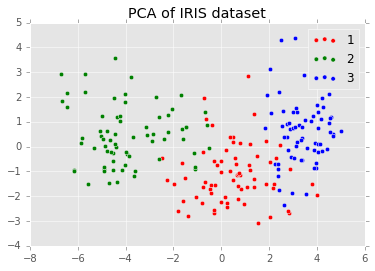

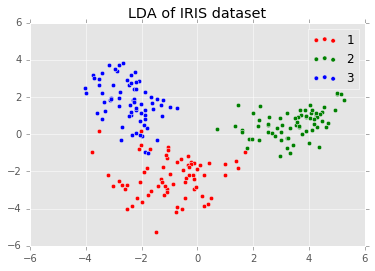

In [117]:
for c, i, target_name in zip("rgb", [1,2,3], [1,2,3]):
    pylab.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
pylab.legend()
pylab.title('PCA of IRIS dataset')

pylab.figure()
for c, i, target_name in zip("rgb", [1,2,3], [1,2,3]):
    pylab.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
pylab.legend()
pylab.title('LDA of IRIS dataset')

In [134]:
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_validation.cross_val_score(clf, X_r, y, cv=5)
print(scores)
print(scores.mean())

[ 0.97619048  0.97619048  0.9047619   0.92857143  0.73809524]
0.904761904762


In [135]:
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_validation.cross_val_score(clf, X_r2, y, cv=5)
print(scores)
print(scores.mean())

[ 0.97619048  0.95238095  1.          1.          0.9047619 ]
0.966666666667


In [136]:
clf = LogisticRegressionCV()
scores = cross_validation.cross_val_score(clf, X_r, y, cv=5)
print(scores)
print(scores.mean())

[ 0.97619048  1.          0.92857143  0.95238095  0.9047619 ]
0.952380952381


In [137]:
clf = LogisticRegressionCV()
scores = cross_validation.cross_val_score(clf, X_r2, y, cv=5)
print(scores)
print(scores.mean())

[ 0.97619048  0.97619048  1.          1.          0.88095238]
0.966666666667


In [138]:
clf = tree.DecisionTreeClassifier()

scores = cross_validation.cross_val_score(clf, X_r, y, cv=5)
print(scores)
print(scores.mean())

[ 0.92857143  0.88095238  0.92857143  0.95238095  0.69047619]
0.87619047619


In [139]:
clf = tree.DecisionTreeClassifier()

scores = cross_validation.cross_val_score(clf, X_r2, y, cv=5)
print(scores)
print(scores.mean())

[ 0.97619048  0.97619048  0.95238095  1.          0.83333333]
0.947619047619


In [140]:
clf = RandomForestClassifier()

scores = cross_validation.cross_val_score(clf, X_r2, y, cv=5)
print(scores)
print(scores.mean())

[ 0.97619048  0.97619048  0.92857143  1.          0.83333333]
0.942857142857
